In [57]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import random
import datetime
from scipy import stats
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE


In [58]:
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score
import xgboost as xgb

In [59]:
!pip install ucimlrepo

!pip install scipy
!pip install xgboost
!pip install imbalanced-learn



#Reading the data

In [60]:
from ucimlrepo import fetch_ucirepo

# Fetch the Adult dataset
dataset = fetch_ucirepo('adult')
#print(dataset)
# Access data 
actual_data=dataset.data.features # give dataset except target
target = dataset.data.targets
# Convert to pandas DataFrame
df = pd.DataFrame(data=actual_data, columns=dataset.headers)
df["income"]=target

# Display the first few rows of the DataFrame
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


Classifying the age child:0-12
Teen: Ages 13-19
Young Adult: Ages 20–34
Adult: Ages 35–60
Senior: Ages 61–100


In [61]:
df1=df.copy()

In [62]:
# Define bins and labels for age categories
bins = [0, 13, 20, 35, 61, 100]  # Age intervals
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']  # Corresponding labels

# Use pd.cut to categorize the age into groups
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)

# Display the DataFrame
print(df1)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [63]:
df1['income']=df1['income'].replace('<=50K.','<=50K')
df1['income']=df1['income'].replace('>50K.','>50K')

In [64]:
# Group by 'Age Group' and calculate the mean salary for each group
grouped = df1.groupby(['age_group']).agg({
    'age_group': ['count']
}) 
# Display the result
print(grouped)

            age_group
                count
age_group            
Child               0
Teen             2510
Young Adult     18499
Adult           24227
Senior           3606


C:\Users\rames\AppData\Local\Temp\ipykernel_26244\3677031028.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df1.groupby(['age_group']).agg({


Elementary: Preschool,1st Grade to 4th Grade
Middle School: 5th Grade to 8th Grade
High School : 9th Grade to 12th Grade


In [65]:
df1['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [66]:
# Function to categorize grade levels
def categorize_grade(grade):
    if grade in ['Preschool', '1st-4th']:
        return 'Elementary'
    elif grade in ['5th-6th', '7th-8th']:
        return 'Middle School'
    elif grade in ['9th', '10th', '11th', '12th']:
        return 'Not HS-grad'
    else:
        return grade
        
# Apply the function to categorize grade levels
df1['education_category'] = df1['education'].apply(categorize_grade)
# Show the result
print(df1)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [67]:
# Group by 'education' 
grouped = df1.groupby(['education_category']).agg({
    'education_category': ['count']
}) 
# Display the result
print(grouped)

                   education_category
                                count
education_category                   
Assoc-acdm                       1601
Assoc-voc                        2061
Bachelors                        8025
Doctorate                         594
Elementary                        330
HS-grad                         15784
Masters                          2657
Middle School                    1464
Not HS-grad                      4614
Prof-school                       834
Some-college                    10878



Part-time: 1–20 hours
Full-time: 21–40 hours
Overtime: 41–60 hours
Extreme: More than 60 hours

#HOUR-PER-WEEK CLEANING

In [68]:
#replacing the outliers in hours per week column:  upperbound outliers with 80
df1['hours-per-week'] = df1['hours-per-week'].apply(lambda x: 80 if x >= 80 else x)

bins = [1, 20, 40, 60, 100]  # Define ranges for hours worked
labels = ['Part-time', 'Full-time', 'Over-time', 'Extreme']  # Corresponding categories

# Use pd.cut to categorize the age into groups
df1['hours-per-week_category'] = pd.cut(df1['hours-per-week'], bins=bins, labels=labels, right=True)

# Display the DataFrame
print(df1)

# Group by 'hours-per-week' 
grouped = df1.groupby(['hours-per-week_category']).agg({
    'hours-per-week_category': ['count']
}) 
# Display the result
print(grouped)

In [69]:
df1['workclass'].replace(['?', ' '], np.nan, inplace=True)
df1['occupation'].replace(['?', ' '], np.nan, inplace=True)
df1['native-country'].replace(['?', ' '], np.nan, inplace=True)


In [70]:
df1.loc[df1['workclass'] == 'Never-worked', 'hours-per-week'] = 0

In [79]:
df1.loc[df1['hours-per-week'] == 0]

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group,education_category
5361,18,Never-worked,6,Never-married,NaN,Own-child,White,Male,0,0,0,United-States,<=50K,Teen,Not HS-grad
10845,23,Never-worked,4,Divorced,NaN,Not-in-family,White,Male,0,0,0,United-States,<=50K,Young Adult,Middle School
14772,17,Never-worked,6,Never-married,NaN,Own-child,White,Male,0,0,0,United-States,<=50K,Teen,Not HS-grad
20337,18,Never-worked,7,Never-married,NaN,Own-child,White,Female,0,0,0,United-States,<=50K,Teen,Not HS-grad
23232,20,Never-worked,10,Never-married,NaN,Own-child,Black,Male,0,0,0,United-States,<=50K,Young Adult,Some-college
32304,30,Never-worked,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,0,United-States,<=50K,Young Adult,HS-grad
32314,18,Never-worked,10,Never-married,NaN,Own-child,White,Male,0,0,0,United-States,<=50K,Teen,Some-college
41346,17,Never-worked,7,Never-married,NaN,Own-child,Black,Female,0,0,0,United-States,<=50K,Teen,Not HS-grad
44168,20,Never-worked,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,0,United-States,<=50K,Young Adult,HS-grad
46459,18,Never-worked,7,Never-married,NaN,Own-child,White,Male,0,0,0,United-States,<=50K,Teen,Not HS-grad


In [80]:
duplicate_count = df1.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 6326


Dropping the duplicate Rows(52 of them)

In [81]:
df1 = df1.drop_duplicates()

In [82]:
df1.shape

(42464, 15)

In [83]:
# dropping the unnecessary columns: fnlwgt(as it is a cencus adjustment value), education(as we have education number)
columns_to_drop = ['fnlwgt', 'education'] 
#Dropping the specified columns
df1 = df1.drop(columns=columns_to_drop)



KeyError: "['fnlwgt', 'education'] not found in axis"

In [ ]:

df1.shape

Imputing Missing value in workclass using random forest

In [84]:
df1['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [85]:
 df1['workclass'].value_counts()

workclass
Private             28311
Self-emp-not-inc     3732
Local-gov            3011
State-gov            1927
Self-emp-inc         1644
Federal-gov          1397
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [86]:
 df1['hours-per-week'].value_counts()

hours-per-week
40    18257
50     3794
45     2514
60     2052
35     1818
      ...  
76        4
61        4
74        3
79        1
69        1
Name: count, Length: 80, dtype: int64

In [87]:
df1['workclass'].isnull().sum()

2411

In [88]:
df1['occupation'].isnull().sum()

2421

In [89]:
df2=df1.copy()

In [90]:
df1.dtypes

age                      int64
workclass               object
education-num            int64
marital-status          object
occupation              object
relationship            object
race                    object
sex                     object
capital-gain             int64
capital-loss             int64
hours-per-week           int64
native-country          object
income                  object
age_group             category
education_category      object
dtype: object

Label encoding

In [91]:
# dropping the unnecessary columns after categorizing: age', 'education-num','hours-per-week'
#columns_to_drop = ['age', 'education-num','hours-per-week'] 
#columns_to_drop = ['hours-per-week'] 
columns_to_drop = ['age', 'education-num'] 
#Dropping the specified columns
df1 = df1.drop(columns=columns_to_drop)

In [92]:
#from sklearn.preprocessing import LabelEncoder
'''
# columns that we are encoding: 
columns_to_encode = ['age_group','workclass', 'marital-status', 'occupation', 'relationship','race', 
                     'sex', 'native-country', 'income' ,'education_category','hours-per-week_category'] 
'''
# columns that we are encoding: 
columns_to_encode = ['age_group','workclass', 'marital-status', 'occupation', 'relationship','race', 
                     'sex', 'native-country', 'income' ,'education_category'] 
# Initialize the LabelEncoder
le = LabelEncoder()

# Dictionary to store mappings for each column
label_mappings = {}

# Apply label encoding and save mappings
for col in columns_to_encode:
    df1[col] = le.fit_transform(df1[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the mapping of each encoded column
for col, mapping in label_mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for age_group: {'Adult': 0, 'Senior': 1, 'Teen': 2, 'Young Adult': 3}
Mapping for workclass: {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7, nan: 8}
Mapping for marital-status: {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}
Mapping for occupation: {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13, nan: 14}
Mapping for relationship: {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
Mapping for race: {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}
Mapping for sex: {'F

# imputing missing values in workclass using random forest classifier

In [93]:
df1['workclass'].value_counts()

workclass
3    28311
5     3732
1     3011
8     2411
6     1927
4     1644
0     1397
7       21
2       10
Name: count, dtype: int64

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



# Separate rows with and without missing values in 'workclass'
df_missing =  df1[df1['workclass'] == 8]
df_not_missing =  df1[df1['workclass'] != 8]


# imputing missing values in workclass
# Define features and target
X =  df_not_missing.drop(columns=['workclass'])   # Features
y = df_not_missing['workclass'] # Target variable (workclass)


# Split the non-missing data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Use the trained model to predict the 'workclass' for rows with missing values
X_missing = df_missing.drop(columns=['workclass'])  # Features for rows with missing values
df_missing['workclass'] = rf.predict(X_missing)

# Combine the data back together
df_imputed= pd.concat([df_not_missing, df_missing])

# Display the imputed DataFrame
#print(df_imputed)
df_imputed['workclass'].value_counts()
df1=df_imputed.copy()

C:\Users\rames\AppData\Local\Temp\ipykernel_26244\3514968036.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['workclass'] = rf.predict(X_missing)


In [95]:
df1.dtypes

workclass             int32
marital-status        int32
occupation            int32
relationship          int32
race                  int32
sex                   int32
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country        int32
income                int32
age_group             int32
education_category    int32
dtype: object

#imputing occupation column using random forest

In [96]:
df1['workclass'].value_counts()

workclass
3    30525
5     3799
1     3108
6     1944
4     1657
0     1399
7       21
2       11
Name: count, dtype: int64

In [97]:
df1['workclass'].isnull().sum()

0

In [98]:
df1['occupation'].value_counts()

occupation
9     5679
3     5412
0     4813
11    4766
2     4726
7     4366
6     2492
14    2421
13    2070
5     1738
4     1431
12    1351
10     944
8      240
1       15
Name: count, dtype: int64

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



# Separate rows with and without missing values in 'occupation'
df_missing =  df1[df1['occupation'] == 14]
df_not_missing =  df1[df1['occupation'] != 14]


# imputing missing values in occupation
# Define features and target
X =  df_not_missing.drop(columns=['occupation'])   # Features
y = df_not_missing['occupation'] # Target variable (occupation)


# Split the non-missing data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Use the trained model to predict the 'workclass' for rows with missing values
X_missing = df_missing.drop(columns=['occupation'])  # Features for rows with missing values
df_missing['occupation'] = rf.predict(X_missing)

# Combine the data back together
df_imputed = pd.concat([df_not_missing, df_missing])

# Display the imputed DataFrame
#print(df_imputed)
df_imputed['occupation'].value_counts()
df1=df_imputed.copy()

C:\Users\rames\AppData\Local\Temp\ipykernel_26244\54630087.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['occupation'] = rf.predict(X_missing)


In [100]:
df1.dtypes

workclass             int32
marital-status        int32
occupation            int32
relationship          int32
race                  int32
sex                   int32
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country        int32
income                int32
age_group             int32
education_category    int32
dtype: object

In [101]:
df1['occupation'].value_counts()

occupation
9     5884
3     5594
0     5221
11    5103
2     4992
7     4879
6     2624
13    2220
5     1854
4     1472
12    1378
10     972
8      256
1       15
Name: count, dtype: int64

## Oversampling >50k

In [102]:
df3=df1.copy()

In [103]:
df1.columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'age_group', 'education_category'],
      dtype='object')

In [104]:
print(df1.dtypes)

workclass             int32
marital-status        int32
occupation            int32
relationship          int32
race                  int32
sex                   int32
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country        int32
income                int32
age_group             int32
education_category    int32
dtype: object


In [105]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Assuming 'income' is the target variable with values '>50K' and '<=50K'
X = df1.drop(columns=['income'])  # Features
y = df1['income']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution after oversampling
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())

# Convert the resampled data back into a DataFrame
X_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_train_resampled, columns=['income'])

# Combine the features and target into a single DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)


Before SMOTE: income
0    25562
1     8409
Name: count, dtype: int64
After SMOTE: income
1    25562
0    25562
Name: count, dtype: int64


In [106]:
df_resampled

,workclass,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,age_group,education_category,income
0,6,2,9,0,1,1,0,0,70,41,0,3,1
1,1,3,9,1,4,0,0,0,40,38,3,2,0
2,3,4,7,1,4,0,0,0,40,38,3,2,0
3,1,2,10,0,4,1,0,0,45,38,0,2,1
4,3,4,7,3,2,1,0,0,40,38,3,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,5,0,6,4,4,0,7430,0,46,38,0,7,1
51120,3,2,9,0,4,1,15024,0,60,38,0,2,1
51121,3,2,11,0,4,1,0,0,52,38,0,1,1
51122,3,2,11,0,4,1,0,0,30,38,0,5,1


In [107]:
y_train_resampled.value_counts()

income
1    25562
0    25562
Name: count, dtype: int64

In [108]:
df1=df_resampled.copy()

In [109]:
df1.shape

(51124, 13)

#Now doing feature selection after oversampling

In [110]:
df1.corr()['income'].sort_values(ascending=False)

income                1.000000
hours-per-week        0.272651
sex                   0.233740
capital-gain          0.193033
capital-loss          0.148457
race                  0.094449
occupation            0.036654
native-country        0.029027
workclass            -0.044264
education_category   -0.152717
marital-status       -0.262700
relationship         -0.306178
age_group            -0.344226
Name: income, dtype: float64

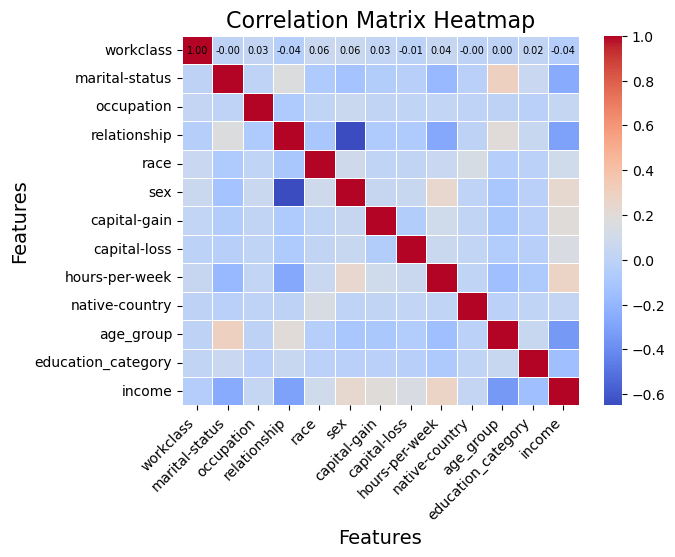

In [111]:
# Compute the correlation matrix
correlation_matrix = df1.corr()
# Create the heatmap
#plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, 
            annot_kws={"size": 7, "color": "black"},  # Annotation options
            fmt=".2f") 

# Set the axis labels and title
plt.title("Correlation Matrix Heatmap", fontsize=16)  # Set title and size
plt.xlabel("Features", fontsize=14)  # X-axis label
plt.ylabel("Features", fontsize=14)  # Y-axis label

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for readability

# Show the heatmap
plt.show()

Feature selection Starting the training process

In [112]:
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder, StandardScaler


X = df1.drop('income',axis=1)
y = df1['income']



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally scale numerical features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

print(X_train)

       workclass  marital-status  occupation  relationship  race  sex  \
9555           1               2           9             5     4    0   
44343          0               2          10             0     2    1   
44098          3               0           3             1     4    0   
34930          3               2           2             0     4    1   
12400          3               4          11             1     4    1   
...          ...             ...         ...           ...   ...  ...   
11284          1               2          10             0     4    1   
44732          3               2          13             0     4    1   
38158          3               2           2             0     2    1   
860            3               4           7             2     4    0   
15795          3               2           4             0     4    1   

       capital-gain  capital-loss  hours-per-week  native-country  age_group  \
9555              0             0          

In [113]:
#Feature selection for chi2
# Initialize SelectKBest with all features
selector = SelectKBest(score_func=chi2, k=11)  # Set k=X.shape[1] to get all feature scores
selector.fit(X, y)

# Get feature scores and p-values
chi2_scores = selector.scores_
p_values = selector.pvalues_

# Ensure scores and p-values are numeric
chi2_scores = pd.to_numeric(chi2_scores, errors='coerce')
p_values = pd.to_numeric(p_values, errors='coerce')

# Create a DataFrame with features and their scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
    
})

#Sort the features by Chi-square scores in descending order
#sorted_features = feature_scores.sort_values(by='Chi2 Score', ascending=False)
#feature_scores['Chi2_Score'], feature_scores['p-value']
print(feature_scores.sort_values(by='Chi2 Score',ascending=False))

               Feature    Chi2 Score        p-value
6         capital-gain  1.023143e+08   0.000000e+00
7         capital-loss  2.064779e+06   0.000000e+00
8       hours-per-week  1.325031e+04   0.000000e+00
10           age_group  1.067722e+04   0.000000e+00
3         relationship  1.057547e+04   0.000000e+00
1       marital-status  2.694915e+03   0.000000e+00
11  education_category  2.151002e+03   0.000000e+00
5                  sex  8.179864e+02  6.630554e-180
2           occupation  1.789457e+02   8.234064e-41
4                 race  8.972284e+01   2.739733e-21
9       native-country  4.653623e+01   8.994017e-12
0            workclass  4.504173e+01   1.928800e-11


#anova

In [114]:
from sklearn.feature_selection import SelectKBest, f_classif


# If you want to select all features, use 'all'
selector = SelectKBest(score_func=f_classif, k='all')  # 'all' will select all features
selector.fit(X, y)

# Get feature scores and p-values
anova_scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame with features and their scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA Score': anova_scores,
    'p-value': p_values
})

# Sort the features by ANOVA score in descending order
sorted_features = feature_scores.sort_values(by='ANOVA Score', ascending=False)
print(sorted_features)

               Feature  ANOVA Score        p-value
10           age_group  6871.786760   0.000000e+00
3         relationship  5288.169087   0.000000e+00
8       hours-per-week  4105.522906   0.000000e+00
1       marital-status  3789.511656   0.000000e+00
5                  sex  2954.434087   0.000000e+00
6         capital-gain  1978.629985   0.000000e+00
11  education_category  1220.764741  2.473113e-264
7         capital-loss  1152.094515  9.524604e-250
4                 race   460.143010  1.258090e-101
0            workclass   100.361066   1.335341e-23
2           occupation    68.774015   1.130750e-16
9       native-country    43.108997   5.226784e-11


# Wrapper Method: Recursive Feature Elimination (RFE):

In [115]:
# Increase max_iter to allow more iterations
model = LogisticRegression(max_iter=5000)
rfe = RFE(model, n_features_to_select=12)
fit = rfe.fit(X, y)

# Get the selected features
#print("Selected Features: ", X.columns[fit.support_])


# Get the feature rankings
ranking = rfe.ranking_

# Create a DataFrame to display feature names and their ranks
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Rank': ranking
})

# Sort the features by rank (1 = most important)
sorted_feature_ranking = feature_ranking.sort_values(by='Rank',ascending=False)

# Print the ranking
print(sorted_feature_ranking)

               Feature  Rank
0            workclass     1
1       marital-status     1
2           occupation     1
3         relationship     1
4                 race     1
5                  sex     1
6         capital-gain     1
7         capital-loss     1
8       hours-per-week     1
9       native-country     1
10           age_group     1
11  education_category     1


In [116]:

models=[]
models.append(('LogisticRegression', LogisticRegression(max_iter=1000)))
models.append(('Naive Bayes',GaussianNB()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=3)))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('XGBClassifier',XGBClassifier(objective='binary:logistic', eval_metric='logloss')))



In [118]:


for name, model in models:
    print(name,model)
    print()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test,y_pred))
   
    print("accuracy: ", accuracy_score(y_test, y_pred))
    
    print("precision: ", precision_score(y_test, y_pred) )   
   
    print("recall: ", recall_score(y_test, y_pred))
    
    print("f1score: ", f1_score(y_test, y_pred))
    print('\n')
    print('\n')
    

LogisticRegression LogisticRegression(max_iter=1000)



C:\Users\rames\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix: 
[[3709 1464]
 [1147 3905]]
accuracy:  0.7446454767726162
precision:  0.7273235239336934
recall:  0.7729612034837688
f1score:  0.7494482295365128




Naive Bayes GaussianNB()

Confusion Matrix: 
[[4849  324]
 [3183 1869]]
accuracy:  0.6570171149144254
precision:  0.8522571819425444
recall:  0.36995249406175773
f1score:  0.5159420289855072




KNN KNeighborsClassifier(n_neighbors=3)

Confusion Matrix: 
[[4217  956]
 [ 508 4544]]
accuracy:  0.8568215158924205
precision:  0.8261818181818181
recall:  0.89944576405384
f1score:  0.8612585291887793




RandomForestClassifier RandomForestClassifier()

Confusion Matrix: 
[[4396  777]
 [ 489 4563]]
accuracy:  0.8761858190709046
precision:  0.854494382022472
recall:  0.9032066508313539
f1score:  0.878175519630485




DecisionTreeClassifier DecisionTreeClassifier()

Confusion Matrix: 
[[4288  885]
 [ 615 4437]]
accuracy:  0.8533007334963325
precision:  0.8337091319052987
recall:  0.8782660332541568
f1score:  0.8554077501445922




Random forest for seletcing feature

               Feature  Importance
1       marital-status    0.182080
3         relationship    0.143395
8       hours-per-week    0.132978
6         capital-gain    0.115460
2           occupation    0.102468
11  education_category    0.090249
10           age_group    0.069373
0            workclass    0.050568
7         capital-loss    0.040669
9       native-country    0.031129
4                 race    0.022336
5                  sex    0.019296


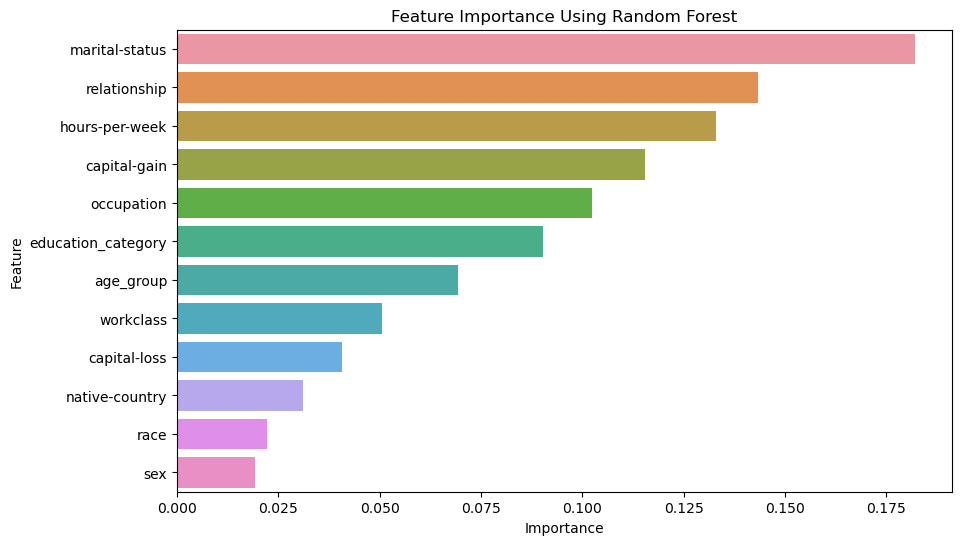

In [119]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame and 'target' is your target column
X = df1.drop('income', axis=1)  # Features
y = df1['income']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a Random Forest Classifier (or Regressor)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importances)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance Using Random Forest')
plt.show()


Now changing the feature selection

In [126]:
#chi2 top 8
X = df1[['capital-gain','capital-loss','hours-per-week','age_group','relationship','marital-status','education_category','sex']]
y = df1['income']

In [128]:
#Anova
X = df1[['age_group', 'relationship','hours-per-week', 'marital-status',  
        'sex', 'capital-gain','education_category','race','capital-loss']]
  
y = df1['income']

In [133]:
#RFE
X = df1.drop('income',axis=1)
y = df1['income']

    

In [134]:
#Random foirest
X = df1[['marital-status', 'relationship', 'hours-per-week','capital-gain',  
        'occupation', 'education_category', 'age_group','workclass']]
        
y = df1['income']


In [135]:
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder, StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally scale numerical features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

print(X_train)

       marital-status  relationship  hours-per-week  capital-gain  occupation  \
9555                2             5              40             0           9   
44343               2             0              40             0          10   
44098               0             1              45             0           3   
34930               2             0              40             0           2   
12400               4             1              40             0          11   
...               ...           ...             ...           ...         ...   
11284               2             0              35          7688          10   
44732               2             0              60             0          13   
38158               2             0              40             0           2   
860                 4             2              30             0           7   
15795               2             0              65             0           4   

       education_category  

In [136]:
models=[]
models.append(('LogisticRegression', LogisticRegression(max_iter=1000)))
models.append(('Naive Bayes',GaussianNB()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=3)))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append((' Neural Network Classifier()', MLPClassifier()))
models.append(('XGBClassifier',XGBClassifier()))


In [137]:

#models1.append(('SVM',SVC(kernel='linear')))
#models1.append(('SVM', SVC(kernel='poly', degree=3, coef0=1, gamma='auto')))
for name, model in models:
    print('\n')
    print(name,model)
    print()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #changing the values into %
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print("confusion_matrix: \n")
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print("Accuracy: {:.2f}%".format(accuracy))
    print("Precision: {:.2f}%".format(precision))
    print("Recall: {:.2f}%".format(recall))
    print("F1 Score: {:.2f}%".format(f1))
    



LogisticRegression LogisticRegression(max_iter=1000)

confusion_matrix: 

[[3649 1524]
 [1158 3894]]


Accuracy: 73.77%
Precision: 71.87%
Recall: 77.08%
F1 Score: 74.38%


Naive Bayes GaussianNB()

confusion_matrix: 

[[4973  200]
 [3602 1450]]


Accuracy: 62.82%
Precision: 87.88%
Recall: 28.70%
F1 Score: 43.27%


KNN KNeighborsClassifier(n_neighbors=3)

confusion_matrix: 

[[4223  950]
 [ 694 4358]]


Accuracy: 83.92%
Precision: 82.10%
Recall: 86.26%
F1 Score: 84.13%


RandomForestClassifier RandomForestClassifier()

confusion_matrix: 

[[4271  902]
 [ 561 4491]]


Accuracy: 85.69%
Precision: 83.27%
Recall: 88.90%
F1 Score: 85.99%


DecisionTreeClassifier DecisionTreeClassifier()

confusion_matrix: 

[[4261  912]
 [ 719 4333]]


Accuracy: 84.05%
Precision: 82.61%
Recall: 85.77%
F1 Score: 84.16%


 Neural Network Classifier() MLPClassifier()

confusion_matrix: 

[[3707 1466]
 [ 602 4450]]


Accuracy: 79.78%
Precision: 75.22%
Recall: 88.08%
F1 Score: 81.15%


XGBClassifier XGBClassifi

# Hyperparameter tuning using GridSearchCV

In [ ]:
# Hyperparameter tuning using GridSearchCV
# Prepare features and target variable
X = df1.drop(columns=['income'])  # Features
y = df1['income']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# List of classifiers and their corresponding parameter grids
models_param_grids = [
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [XGBoostClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 4, 5],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    {
        'classifier': [LogisticRegression(max_iter=500)],
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    }
]
# Loop through models and perform hyperparameter tuning
best_models = []
for param_grid in models_param_grids:
    pipeline = Pipeline([
        ('classifier', param_grid['classifier'][0])
    ])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    # Best model and parameters for the current classifier
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_model = grid_search.best_estimator_
    print(f"Model: {param_grid['classifier'][0].__class__.__name__}")
    print(f"Best Parameters: {best_params}")
    print(f"Best Score (Accuracy): {best_score:.4f}")
    # Save the best model from each classifier
    best_models.append((best_model, best_score))
# Evaluate the best models on the test set
for model, score in best_models:
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {model.named_steps['classifier'].__class__.__name__}: {test_accuracy:.4f}")

In [ ]:
# Hyperparameter tuning using RandomizedSearchCV

In [ ]:
# Hyperparameter tuning using RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# Prepare features and target variable
X = df1.drop(columns=['income'])  # Features
y = df1['income']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# List of classifiers and their corresponding random search parameter distributions
models_param_distributions = [
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': randint(50, 200),
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': randint(2, 10)
    },
    {
        'classifier': [XGBoostClassifier()],
        'classifier__n_estimators': randint(50, 200),
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': randint(3, 5),
        'classifier__min_samples_split': randint(2, 10)
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    {
        'classifier': [LogisticRegression(max_iter=500)],
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': randint(2, 10)
    }
]
# Loop through models and perform hyperparameter tuning using RandomizedSearchCV
best_models = []
for param_distribution in models_param_distributions:
    pipeline = Pipeline([
        ('classifier', param_distribution['classifier'][0])
    ])
    random_search = RandomizedSearchCV(
        pipeline,
        param_distribution,
        cv=5,
        n_iter=10,  # Number of parameter settings to sample
        n_jobs=-1,
        verbose=1,
        scoring='accuracy',
        random_state=42
    )
    random_search.fit(X_train, y_train)
    # Best model and parameters for the current classifier
    best_params = random_search.best_params_
    best_score = random_search.best_score_
    best_model = random_search.best_estimator_
    print(f"Model: {param_distribution['classifier'][0].__class__.__name__}")
    print(f"Best Parameters: {best_params}")
    print(f"Best Score (Accuracy): {best_score:.4f}")
    # Save the best model from each classifier
    best_models.append((best_model, best_score))
# Evaluate the best models on the test set
for model, score in best_models:
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {model.named_steps['classifier'].__class__.__name__}: {test_accuracy:.4f}")